In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras import models
from keras import layers

In [4]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df1 = pd.read_csv('train/all-data.csv', header=None, encoding= 'unicode_escape')
df1 = df1.dropna()
df1.columns = ['label', 'text']
#df1
df_neutral = df1.loc[df1['label'] == 'neutral']
#df_neutral
df_opi = df1.loc[df1['label'] != 'neutral']
df_opi

,label,text
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
...,...,...
4840,negative,HELSINKI Thomson Financial - Shares in Cargote...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [3]:
df1 = pd.read_csv('train/apple-twitter-sentiment-texts.csv', header=0,)
df1 = df1.dropna()
df1 = df1.rename({'sentiment': 'label'}, axis='columns')
temp_neu = df1.loc[df1['label'] == 'neutral']
temp_opi = df1.loc[df1['label'] != 'neutral']
df_neutral = df_neutral.append(temp_neu)
df_opi = df_opi.append(temp_opi)
df_neutral = df_neutral.reset_index(drop=True)
df_opi = df_opi.reset_index(drop=True)

C:\Users\Trevor\AppData\Local\Temp\ipykernel_24480\2171812143.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_neutral = df_neutral.append(temp_neu)
C:\Users\Trevor\AppData\Local\Temp\ipykernel_24480\2171812143.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opi = df_opi.append(temp_opi)


In [4]:
df1 = pd.read_csv('train/finalSentimentdata2.csv', header=0,)
df1 = df1.dropna()
temp_neu = df1.loc[df1['label'] == 'neutral']
temp_opi = df1.loc[df1['label'] != 'neutral']
df_neutral = df_neutral.append(temp_neu)
df_opi = df_opi.append(temp_opi)
df_neutral = df_neutral.reset_index(drop=True)
df_opi = df_opi.reset_index(drop=True)

C:\Users\Trevor\AppData\Local\Temp\ipykernel_24480\4193169756.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_neutral = df_neutral.append(temp_neu)
C:\Users\Trevor\AppData\Local\Temp\ipykernel_24480\4193169756.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opi = df_opi.append(temp_opi)


In [5]:
df1 = pd.read_csv('train/Twitter_Data.csv', header=0,)
df1 = df1.dropna()
temp_neu = df1.loc[df1['label'] == 'neutral']
temp_opi = df1.loc[df1['label'] != 'neutral']
df_neutral = df_neutral.append(temp_neu)
df_opi = df_opi.append(temp_opi)
df_neutral = df_neutral.reset_index(drop=True)
df_opi = df_opi.reset_index(drop=True)

C:\Users\Trevor\AppData\Local\Temp\ipykernel_24480\817469992.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_neutral = df_neutral.append(temp_neu)
C:\Users\Trevor\AppData\Local\Temp\ipykernel_24480\817469992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opi = df_opi.append(temp_opi)


In [6]:
df_opi

,label,text
0,negative,The international electronic industry company ...
1,positive,With the new production plant the company woul...
2,positive,According to the company 's updated strategy f...
3,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
4,positive,"For the last quarter of 2010 , Componenta 's n..."
...,...,...
113639,positive,engine growth modi unveils indias first 12000 ...
113640,positive,modi promised 2014 lok sabha elections that be...
113641,negative,why these 456 crores paid neerav modi not reco...
113642,negative,dear rss terrorist payal gawar what about modi...


In [8]:
df_pos = df_opi.loc[df_opi['label'] == 'positive']
df_pos

,label,text
1,positive,With the new production plant the company woul...
2,positive,According to the company 's updated strategy f...
3,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
4,positive,"For the last quarter of 2010 , Componenta 's n..."
5,positive,"In the third quarter of 2010 , net sales incre..."
...,...,...
113637,positive,objective cover everything from akhlaq ramalin...
113638,positive,raga knows dat wont spared modi courts for his...
113639,positive,engine growth modi unveils indias first 12000 ...
113640,positive,modi promised 2014 lok sabha elections that be...


In [9]:
df_neg = df_opi.loc[df_opi['label'] == 'negative']
df_neg

,label,text
0,negative,The international electronic industry company ...
364,negative,A tinyurl link takes users to a scamming site ...
365,negative,"Compared with the FTSE 100 index , which rose ..."
366,negative,"Compared with the FTSE 100 index , which rose ..."
398,negative,One of the challenges in the oil production in...
...,...,...
113630,negative,when narender modi contested two seats was not...
113634,negative,modi decimates congress front crores congress ...
113636,negative,azamgarh please poor working requirement jogia...
113641,negative,why these 456 crores paid neerav modi not reco...


In [7]:
df_neutral

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,neutral,At the request of Finnish media company Alma M...
3,neutral,"In Sweden , Gallerix accumulated SEK denominat..."
4,neutral,The company supports its global customers in d...
...,...,...
58886,neutral,case dont look candidate then that case person...
58887,neutral,congress veteran sudhakar reddy joins bjp afte...
58888,neutral,save your agenda peddling ’ had with terror at...
58889,neutral,did you cover her interaction forum where she ...


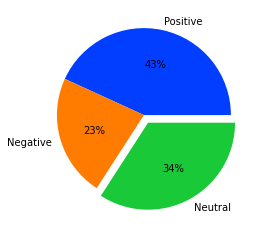

In [14]:
import matplotlib.pyplot as plt
import seaborn
data = [74482, 39162, 58891]
keys = ['Positive', 'Negative', 'Neutral']
palette_color = seaborn.color_palette('bright')
explode = [0, 0, 0.1]
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.show()

In [8]:
import re
import string

# # download missing resource
# import nltk
# nltk.download("stopwords")

from nltk.corpus import stopwords
from emot.emo_unicode import UNICODE_EMOJI  # for emojis
from emot.emo_unicode import EMOTICONS_EMO  # for emoticons

In [103]:
# Converting emojis to words
def convert_emojis(text):
    for i in text:
        if i in UNICODE_EMOJI.keys():
            try:
                text = text.replace(i, f' {"_".join(UNICODE_EMOJI[i].replace(",","").replace(":","").split())}')
            except:
                continue
    
    return text


# Converting emoticons to words    
def convert_emoticons(text):
    for i in text.split():
        if i in EMOTICONS_EMO.keys():
            text = text.replace(i, "_".join(EMOTICONS_EMO[i].replace(",","").split()))
    return text


# Function for removing urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


# custom punctuation
punctuations = string.punctuation + "´‘’“”…–€«»"

# Function to replace/remove junk seen during manual labelling
def dejunk(text):
    text = re.sub(r"𝓟𝓻𝓲𝓬𝓮𝓵𝓮𝓼𝓼 𝓲𝓼 𝓽𝓱𝓮 𝓶𝓸𝓼𝓽 𝓿𝓪𝓵𝓾𝓪𝓫𝓵𝓮 𝓪𝓼𝓼𝓮𝓽 𝓽𝓸 𝓸𝔀𝓷 𝓲𝓯 𝔂𝓸𝓾 𝓪𝓻𝓮 𝓵𝓾𝓬𝓴𝔂 𝓮𝓷𝓸𝓾𝓰𝓱 𝓽𝓸 𝓫𝓮 𝓪𝓫𝓵𝓮 𝓽𝓸 𝓪𝓬𝓺𝓾𝓲𝓻𝓮 𝓲𝓽", 
                  "priceless is the most valuable asset to own if you are lucky enough to be able to acquire it", text)
    
    text = re.sub(r"&amp;", "and", text)  # &
    text = re.sub(r"&gt;", "", text)  # >
    text = re.sub(r"&lt;", "", text)  # <
    text = re.sub(r"1⃣", "1. ", text)
    text = re.sub(r"2⃣", "2. ", text)
    text = re.sub(r"3⃣", "3. ", text)
    text = re.sub(r"4⃣", "4. ", text)

    return text

In [104]:
#making a text-cleaning function
def preprocess_text(text):
    
    #convert lowercase
    cleaned_text = text.lower()

    # Replace/remove junk text
    cleaned_text = dejunk(cleaned_text)
    
    #convert emoji into words
    cleaned_text = convert_emojis(cleaned_text)
    
    # convert emoticons into words
    cleaned_text = convert_emoticons(cleaned_text)
    
    # remove urls
    cleaned_text = remove_urls(cleaned_text)
    
    #remove punctuations
    nopunc = [char for char in cleaned_text if char not in punctuations]
    nopunc = ''.join(nopunc)
    
    #remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    #return cleaned text
    return ' '.join(clean_words)

In [106]:
df_neutral["text"] = df_neutral["text"].apply(preprocess_text)

df_neutral

,label,text
0,neutral,according gran company plans move production r...
1,neutral,technopolis plans develop stages area less 100...
2,neutral,request finnish media company alma media newsp...
3,neutral,sweden gallerix accumulated sek denominated sa...
4,neutral,company supports global customers developing n...
...,...,...
58886,neutral,case dont look candidate case person like manm...
58887,neutral,congress veteran sudhakar reddy joins bjp meet...
58888,neutral,save agenda peddling terror attacks every seco...
58889,neutral,cover interaction forum left


In [109]:
df_neutral.to_csv('df_neutral_clean.csv')

In [115]:
df_opi

,label,text
0,negative,The international electronic industry company ...
1,positive,With the new production plant the company woul...
2,positive,According to the company 's updated strategy f...
3,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
4,positive,"For the last quarter of 2010 , Componenta 's n..."
...,...,...
113639,positive,engine growth modi unveils indias first 12000 ...
113640,positive,modi promised 2014 lok sabha elections that be...
113641,negative,why these 456 crores paid neerav modi not reco...
113642,negative,dear rss terrorist payal gawar what about modi...


In [116]:
df_opi["text"] = df_opi["text"].apply(preprocess_text)

df_opi

,label,text
0,negative,international electronic industry company elco...
1,positive,new production plant company would increase ca...
2,positive,according company updated strategy years 20092...
3,positive,financing aspocomp growth aspocomp aggressivel...
4,positive,last quarter 2010 componenta net sales doubled...
...,...,...
113639,positive,engine growth modi unveils indias first 12000 ...
113640,positive,modi promised 2014 lok sabha elections best or...
113641,negative,456 crores paid neerav modi recovered congress...
113642,negative,dear rss terrorist payal gawar modi killing 10...


In [117]:
df_opi.to_csv('df_opi_clean.csv')

In [119]:
df_opi_1 = df_opi
df_opi_1['label'] = df_opi_1['label'].replace(['negative', 'positive'], 'opiniated')
df_opi_1

,label,text
0,opiniated,international electronic industry company elco...
1,opiniated,new production plant company would increase ca...
2,opiniated,according company updated strategy years 20092...
3,opiniated,financing aspocomp growth aspocomp aggressivel...
4,opiniated,last quarter 2010 componenta net sales doubled...
...,...,...
113639,opiniated,engine growth modi unveils indias first 12000 ...
113640,opiniated,modi promised 2014 lok sabha elections best or...
113641,opiniated,456 crores paid neerav modi recovered congress...
113642,opiniated,dear rss terrorist payal gawar modi killing 10...


<h1> Load processed corpus

In [3]:
df_neutral = pd.read_csv('train/df_neutral_clean.csv', header=0,)
df_opi_1 = pd.read_csv('train/df_opi_clean.csv', header=0,)

In [4]:
df_train = df_neutral.append(df_opi_1)
df_train = df_train.reset_index(drop=True)
df_train

C:\Users\Trevor\AppData\Local\Temp\ipykernel_21192\2531838838.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_neutral.append(df_opi_1)


,label,text
0,neutral,according gran company plans move production r...
1,neutral,technopolis plans develop stages area less 100...
2,neutral,request finnish media company alma media newsp...
3,neutral,sweden gallerix accumulated sek denominated sa...
4,neutral,company supports global customers developing n...
...,...,...
172530,positive,engine growth modi unveils indias first 12000 ...
172531,positive,modi promised 2014 lok sabha elections best or...
172532,negative,456 crores paid neerav modi recovered congress...
172533,negative,dear rss terrorist payal gawar modi killing 10...


In [5]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
porter = PorterStemmer()

In [28]:
def stem_text(text):
    
    #stem
    stemmed_sentence = [porter.stem(word) for word in word_tokenize(text)]
    
    #return cleaned text
    return ' '.join(stemmed_sentence)

In [30]:
df_opi_1["text"] = df_opi_1["text"].astype("str").apply(stem_text)

df_opi_1

,label,text
0,negative,intern electron industri compani elcoteq laid ...
1,positive,new product plant compani would increas capac ...
2,positive,accord compani updat strategi year 20092012 ba...
3,positive,financ aspocomp growth aspocomp aggress pursu ...
4,positive,last quarter 2010 componenta net sale doubl eu...
...,...,...
113639,positive,engin growth modi unveil india first 12000 ele...
113640,positive,modi promis 2014 lok sabha elect best orop giv...
113641,negative,456 crore paid neerav modi recov congress lead...
113642,negative,dear rss terrorist payal gawar modi kill 1000 ...


In [31]:
df_opi_1.to_csv('df_opi_clean_stem.csv')

In [32]:
df_neutral["text"] = df_neutral["text"].astype("str").apply(stem_text)

df_neutral

,label,text
0,neutral,accord gran compani plan move product russia a...
1,neutral,technopoli plan develop stage area less 100000...
2,neutral,request finnish media compani alma media newsp...
3,neutral,sweden gallerix accumul sek denomin sale 1 eur...
4,neutral,compani support global custom develop new tech...
...,...,...
58886,neutral,case dont look candid case person like manmoha...
58887,neutral,congress veteran sudhakar reddi join bjp meet ...
58888,neutral,save agenda peddl terror attack everi second d...
58889,neutral,cover interact forum left


In [33]:
df_neutral.to_csv('df_neutral_clean_stem.csv')

In [34]:
df_opi_1['label'] = df_opi_1['label'].replace(['negative', 'positive'], 'opiniated')
df_opi_1

,label,text
0,opiniated,intern electron industri compani elcoteq laid ...
1,opiniated,new product plant compani would increas capac ...
2,opiniated,accord compani updat strategi year 20092012 ba...
3,opiniated,financ aspocomp growth aspocomp aggress pursu ...
4,opiniated,last quarter 2010 componenta net sale doubl eu...
...,...,...
113639,opiniated,engin growth modi unveil india first 12000 ele...
113640,opiniated,modi promis 2014 lok sabha elect best orop giv...
113641,opiniated,456 crore paid neerav modi recov congress lead...
113642,opiniated,dear rss terrorist payal gawar modi kill 1000 ...


In [44]:
df_train = df_neutral.append(df_opi_1)
df_train = df_train.reset_index(drop=True)
df_train

C:\Users\Trevor\AppData\Local\Temp\ipykernel_9900\2531838838.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_neutral.append(df_opi_1)


,label,text
0,neutral,accord gran compani plan move product russia a...
1,neutral,technopoli plan develop stage area less 100000...
2,neutral,request finnish media compani alma media newsp...
3,neutral,sweden gallerix accumul sek denomin sale 1 eur...
4,neutral,compani support global custom develop new tech...
...,...,...
172530,opiniated,engin growth modi unveil india first 12000 ele...
172531,opiniated,modi promis 2014 lok sabha elect best orop giv...
172532,opiniated,456 crore paid neerav modi recov congress lead...
172533,opiniated,dear rss terrorist payal gawar modi kill 1000 ...


<h1> Load corpus and Train

In [7]:
df_neutral = pd.read_csv('train/df_neutral_clean_stem.csv', header=0,)
df_opi_1 = pd.read_csv('train/df_opi_clean_stem.csv', header=0,)
df_neutral['label'] = df_neutral['label'].replace(['neutral'], 0)
df_opi_1['label'] = df_opi_1['label'].replace(['negative', 'positive'], 1)

In [8]:
df_train = df_neutral.append(df_opi_1)
df_train = df_train.reset_index(drop=True)
df_train

C:\Users\Trevor\AppData\Local\Temp\ipykernel_21192\2531838838.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_neutral.append(df_opi_1)


,label,text
0,0,accord gran compani plan move product russia a...
1,0,technopoli plan develop stage area less 100000...
2,0,request finnish media compani alma media newsp...
3,0,sweden gallerix accumul sek denomin sale 1 eur...
4,0,compani support global custom develop new tech...
...,...,...
172530,1,engin growth modi unveil india first 12000 ele...
172531,1,modi promis 2014 lok sabha elect best orop giv...
172532,1,456 crore paid neerav modi recov congress lead...
172533,1,dear rss terrorist payal gawar modi kill 1000 ...


In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_train['text'].astype("str")
y = df_train['label']

In [11]:
#random_state is the seed used in randomising grouping
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1, random_state=16
)


In [9]:

from keras.preprocessing.text import Tokenizer
# create the tokenizer to tokenize each word
tokenizer = Tokenizer(lower=False)

In [51]:
#term document incidence matrix (one-hot)

from keras.preprocessing.text import Tokenizer
# create the tokenizer to tokenize each word
tokenizer = Tokenizer(lower=False)

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
X_train = tokenizer.texts_to_matrix(X_train, mode='count')

# encode training data set
X_test = tokenizer.texts_to_matrix(X_test, mode='count')

n_words1 = X_test.shape[1]

MemoryError: Unable to allocate 106. GiB for an array with shape (155281, 91357) and data type float64

In [13]:
df_train_small = df_train.sample(frac =.2)

In [14]:
X = df_train_small['text'].astype("str")
y = df_train_small['label']
#random_state is the seed used in randomising grouping
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1, random_state=16
)
tokenizer = Tokenizer(lower=False)

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
X_train = tokenizer.texts_to_matrix(X_train, mode='count')

# encode training data set
X_test = tokenizer.texts_to_matrix(X_test, mode='count')

n_words1 = X_test.shape[1]


In [15]:
n_words1

32352

In [16]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

<h1>For binary

In [17]:
model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(512, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
       
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.03),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    #callbacks=callbacks,
                   )

C:\Users\Trevor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
971/971 [==============================] - 12s 8ms/step - loss: 0.4642 - acc: 0.7851 - val_loss: 0.3523 - val_acc: 0.8450
Epoch 2/15
971/971 [==============================] - 7s 7ms/step - loss: 0.2856 - acc: 0.8887 - val_loss: 0.3344 - val_acc: 0.8673
Epoch 3/15
971/971 [==============================] - 7s 7ms/step - loss: 0.2134 - acc: 0.9215 - val_loss: 0.3350 - val_acc: 0.8722
Epoch 4/15
971/971 [==============================] - 7s 7ms/step - loss: 0.1788 - acc: 0.9343 - val_loss: 0.3545 - val_acc: 0.8690
Epoch 5/15
971/971 [==============================] - 7s 7ms/step - loss: 0.1539 - acc: 0.9451 - val_loss: 0.4173 - val_acc: 0.8531
Epoch 6/15
971/971 [==============================] - 7s 7ms/step - loss: 0.1419 - acc: 0.9491 - val_loss: 0.4312 - val_acc: 0.8739
Epoch 7/15
971/971 [==============================] - 7s 7ms/step - loss: 0.1251 - acc: 0.9567 - val_loss: 0.3905 - val_acc: 0.8711
Epoch 8/15
971/971 [==============================] - 7s 7ms/step - loss: 0

In [18]:
model.save("ood_model_small_stem.h5")

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               16564736  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

<h1> For multi class

In [40]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(512, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
       
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

#use categorical cos not binary
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.003),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    #callbacks=callbacks,
                   )

test_mod = model

Epoch 1/15


C:\Users\Trevor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 4s 30ms/step - loss: 1.8896 - acc: 0.3738 - val_loss: 1.0520 - val_acc: 0.4675
Epoch 2/15
10/10 [==============================] - 0s 10ms/step - loss: 1.5727 - acc: 0.4230 - val_loss: 1.0336 - val_acc: 0.4675
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 1.3728 - acc: 0.3934 - val_loss: 1.0316 - val_acc: 0.4675
Epoch 4/15
10/10 [==============================] - 0s 9ms/step - loss: 1.3480 - acc: 0.4459 - val_loss: 1.0337 - val_acc: 0.4675
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 1.3877 - acc: 0.4131 - val_loss: 1.0388 - val_acc: 0.4675
Epoch 6/15
10/10 [==============================] - 0s 10ms/step - loss: 1.0607 - acc: 0.4984 - val_loss: 1.0541 - val_acc: 0.4675
Epoch 7/15
10/10 [==============================] - 0s 9ms/step - loss: 1.0277 - acc: 0.5377 - val_loss: 1.0687 - val_acc: 0.4675
Epoch 8/15
10/10 [==============================] - 0s 9ms/step - loss: 0.9422 - acc: 0.5967 - va

In [20]:
bleh = ["I hate this module it is shit"]
t = tokenizer.texts_to_matrix(bleh, mode='count')
pred = model.predict(t, verbose=0)
print(pred[0])

[0.99799347]


In [21]:
bleh = ["The name of the module is information retrieval"]
t = tokenizer.texts_to_matrix(bleh, mode='count')
pred = model.predict(t, verbose=0)
print(pred[0])

[0.00099734]


In [29]:
import matplotlib.pyplot as plt

def plot_history(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.figure(2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


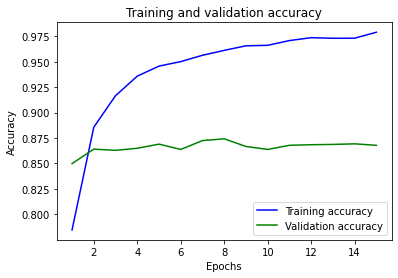

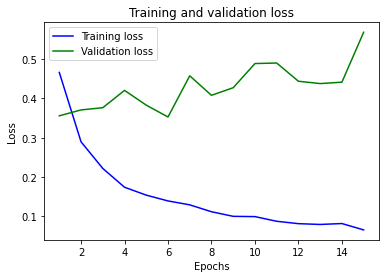

In [56]:
plot_history(history)

<h1> for opinionated only

In [5]:
df_opi_1 = pd.read_csv('train/df_opi_clean_stem.csv', header=0,)
df_opi_1['label'] = df_opi_1['label'].replace(['negative'], 0)
df_opi_1['label'] = df_opi_1['label'].replace(['positive'], 1)
df_opi_1

,label,text
0,0,intern electron industri compani elcoteq laid ...
1,1,new product plant compani would increas capac ...
2,1,accord compani updat strategi year 20092012 ba...
3,1,financ aspocomp growth aspocomp aggress pursu ...
4,1,last quarter 2010 componenta net sale doubl eu...
...,...,...
113639,1,engin growth modi unveil india first 12000 ele...
113640,1,modi promis 2014 lok sabha elect best orop giv...
113641,0,456 crore paid neerav modi recov congress lead...
113642,0,dear rss terrorist payal gawar modi kill 1000 ...


In [6]:
df_train_opi_small = df_opi_1.sample(frac =.2)

In [10]:
X = df_train_opi_small['text'].astype("str")
y = df_train_opi_small['label']
#random_state is the seed used in randomising grouping
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1, random_state=16
)
tokenizer = Tokenizer(lower=False)

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
X_train = tokenizer.texts_to_matrix(X_train, mode='count')

# encode training data set
X_test = tokenizer.texts_to_matrix(X_test, mode='count')

n_words1 = X_test.shape[1]


In [11]:
n_words1

26668

In [13]:
import pickle
# saving
with open('tokenizer_opi.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_opi.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [14]:
opi_model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(512, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
       
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(1, activation='sigmoid')
])

opi_model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.03),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = opi_model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    #callbacks=callbacks,
                   )

C:\Users\Trevor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
640/640 [==============================] - 9s 9ms/step - loss: 0.5158 - acc: 0.7507 - val_loss: 0.3970 - val_acc: 0.8258
Epoch 2/15
640/640 [==============================] - 5s 8ms/step - loss: 0.3036 - acc: 0.8753 - val_loss: 0.4263 - val_acc: 0.8306
Epoch 3/15
640/640 [==============================] - 5s 8ms/step - loss: 0.2038 - acc: 0.9220 - val_loss: 0.5193 - val_acc: 0.8249
Epoch 4/15
640/640 [==============================] - 5s 7ms/step - loss: 0.1652 - acc: 0.9382 - val_loss: 0.5018 - val_acc: 0.8192
Epoch 5/15
640/640 [==============================] - 5s 8ms/step - loss: 0.1346 - acc: 0.9518 - val_loss: 0.7291 - val_acc: 0.8297
Epoch 6/15
640/640 [==============================] - 5s 7ms/step - loss: 0.1235 - acc: 0.9563 - val_loss: 0.4929 - val_acc: 0.8421
Epoch 7/15
640/640 [==============================] - 5s 7ms/step - loss: 0.1074 - acc: 0.9627 - val_loss: 0.7323 - val_acc: 0.8205
Epoch 8/15
640/640 [==============================] - 5s 8ms/step - loss: 0.

In [15]:
opi_model.save("ood_opi_model_small_stem.h5")

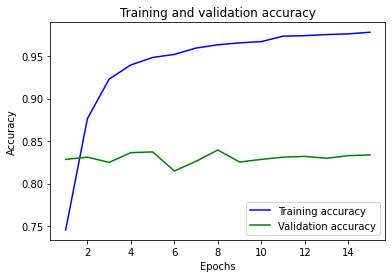

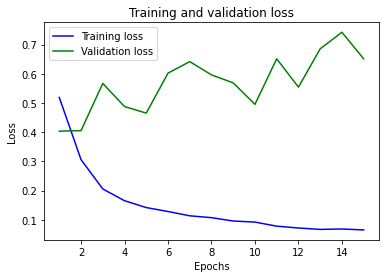

In [68]:
plot_history(history)

In [29]:
bleh = ["I hate this module it is shit"]
t = tokenizer.texts_to_matrix(bleh, mode='count')
pred = opi_model.predict(t, verbose=0)
print(pred[0])

[4.4909723e-07]


In [30]:
bleh = ["I love this module it is amazing"]
t = tokenizer.texts_to_matrix(bleh, mode='count')
pred = opi_model.predict(t, verbose=0)
print(pred[0])

[0.9995123]


<h1> test on others

In [41]:
test_mod.save("cmts_cnn_model.h5")

In [55]:
test_mod.save_weights("testweights.h5")

In [54]:
test_mod.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               916480    
                                                                 
 batch_normalization_26 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_27 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_27 (Dropout)        (None, 256)              

In [252]:
model1 = models.load_model("testmodel.h5")
testdf = pd.read_csv('Cleaned datasets/cmts_cleaned.csv', header=0)
testdf = testdf['cleaned_text']
testdf = testdf.head(50)

In [250]:
predictions = []

In [253]:
for i in testdf:
    t = [str(i)]
    t = tokenizer.texts_to_matrix(t, mode='count')
    pred = test_mod.predict(t, verbose=0)
    print(pred[0])
    
    if(pred[0][0] >= pred[0][1]) and (pred[0][0] >= pred[0][2]):
        predictions.append(-1)
    elif(pred[0][1] >= pred[0][0]) and (pred[0][1] >= pred[0][2]):
        predictions.append(0)
    else:
        predictions.append(1)
#    break
print(predictions)

[0.50480294 0.20438887 0.29080826]
[0.5161328  0.22634795 0.25751933]
[0.37581882 0.23584113 0.3883401 ]
[0.42778957 0.27448857 0.29772186]
[0.49979553 0.26242536 0.23777914]
[1.3547638e-04 5.7502608e-03 9.9411434e-01]
[0.23733112 0.17154546 0.5911234 ]
[0.5216474  0.21184199 0.2665106 ]
[0.38772604 0.35784224 0.25443172]
[0.42224282 0.19166242 0.38609475]
[0.5306421  0.2390119  0.23034601]
[0.70265657 0.21307538 0.08426804]
[0.29127836 0.2268247  0.4818969 ]
[0.60157704 0.16632652 0.23209643]
[0.67906004 0.15045479 0.17048518]
[0.09852838 0.15265343 0.7488183 ]
[0.3926248  0.19313066 0.41424456]
[0.63176936 0.18197624 0.18625443]
[0.44329828 0.18281138 0.3738903 ]
[0.5216474  0.21184199 0.2665106 ]
[0.5885507  0.2040644  0.20738494]
[0.38542944 0.28307298 0.33149752]
[0.41850442 0.17394747 0.4075481 ]
[0.45184708 0.22050425 0.32764864]
[0.20852481 0.15982646 0.6316487 ]
[0.52745765 0.20300709 0.2695353 ]
[0.5421718  0.17620799 0.28162023]
[0.5437137  0.21086505 0.24542129]
[0.5216474 

In [ ]:
cleanPredict = []
for tuple in predictions:
    max = np.argmax(tuple)
    temp = [max]
    cleanPredict.append(temp)
cleanPredict

In [ ]:
df = pd.read_csv('comments.csv')
df